In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import sklearn
sklearn.__version__


'1.1.1'

In [2]:
company=pd.read_csv(r"C:\Users\Shivam\Downloads\Company_Data.csv")
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


# eda 



In [3]:
company.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
company.shape

(400, 11)

In [5]:
company.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

### Data Preparation


In [6]:
company['ShelveLoc']=company['ShelveLoc'].astype('category')
company['Urban']=company['Urban'].astype('category')
company['US']=company['ShelveLoc'].astype('category')

company.dtypes

Sales           float64
CompPrice         int64
Income            int64
Advertising       int64
Population        int64
Price             int64
ShelveLoc      category
Age               int64
Education         int64
Urban          category
US             category
dtype: object

In [7]:
label_encoder=preprocessing.LabelEncoder()
company['US']=label_encoder.fit_transform(company['US'])

In [8]:
label_encoder=preprocessing.LabelEncoder()
company['Urban']=label_encoder.fit_transform(company['Urban'])

In [9]:
label_encoder=preprocessing.LabelEncoder()
company['ShelveLoc']=label_encoder.fit_transform(company['ShelveLoc'])

In [10]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,0
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,2
3,7.40,117,100,4,466,97,2,55,14,1,2
4,4.15,141,64,3,340,128,0,38,13,1,0


In [11]:
company['Sales']=company['Sales'].map(lambda x:1 if x>8 else 0)
company['Sales']

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: Sales, Length: 400, dtype: int64

In [12]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,0
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,2
3,0,117,100,4,466,97,2,55,14,1,2
4,0,141,64,3,340,128,0,38,13,1,0


In [13]:
X=company.drop(labels='Sales',axis=1)
y=company[['Sales']]

In [14]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,0
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,2
3,117,100,4,466,97,2,55,14,1,2
4,141,64,3,340,128,0,38,13,1,0


In [15]:
y.head()

,Sales
0,1
1,1
2,1
3,0
4,0


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

In [17]:
X_train.shape,y_train.shape

((320, 10), (320, 1))

In [18]:
X_test.shape,y_test.shape

((80, 10), (80, 1))

# model traning

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100,max_depth=5)
rf_model.fit(X_train,y_train)

<ipython-input-19-3ee678637546>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestClassifier(max_depth=5)

In [20]:
rf_model = RandomForestClassifier( n_estimators=100)
rf_model.fit(X_train,y_train)

<ipython-input-20-bdc258dade74>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train,y_train)


RandomForestClassifier()

# model testing

In [21]:
y_train_pred = rf_model.predict(X_train) 

In [22]:
y_test_pred = rf_model.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [24]:
accuracy_score(y_train,y_train_pred)

1.0

In [25]:
confusion_matrix(y_train,y_train_pred)

array([[187,   0],
       [  0, 133]], dtype=int64)

In [26]:
precision_score(y_train,y_train_pred)

1.0

In [27]:
recall_score(y_train,y_train_pred)

1.0

In [28]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       133

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320



1.0


Text(0, 0.5, 'True Positive Rate')

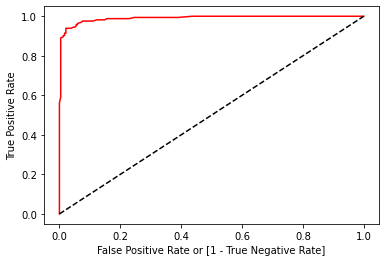

In [29]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, rf_model.predict_proba (X)[:,1])

auc = roc_auc_score(y_train,y_train_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

# testing data 

In [30]:
accuracy_score(y_test,y_test_pred)

0.8125

# i can see here the model got over fit 

In [31]:
confusion_matrix(y_test,y_test_pred)

array([[44,  5],
       [10, 21]], dtype=int64)

In [32]:
precision_score(y_test,y_test_pred)

0.8076923076923077

In [33]:
recall_score(y_test,y_test_pred)

0.6774193548387096